## 1. Data Source
- https://mysmartenergy.uk/Tracker/Southern-England

In [1]:
import pandas as pd
tracker = pd.read_csv('Tracker.csv')
agile = pd.read_csv('Agile.csv')

In [2]:
tracker.info()
tracker.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Local_Date      330 non-null    object 
 1    Price_Inc_VAT  330 non-null    float64
 2    Price_Ex_VAT   330 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.9+ KB


,Local_Date,Price_Inc_VAT,Price_Ex_VAT
0,17 Nov 2022,21.77,20.73
1,18 Nov 2022,20.97,19.97
2,19 Nov 2022,23.85,22.71
3,20 Nov 2022,21.82,20.78
4,21 Nov 2022,24.72,23.54


In [3]:
tracker.columns

Index(['Local_Date', ' Price_Inc_VAT', ' Price_Ex_VAT'], dtype='object')

## 2.Data Process

In [4]:
tracker.drop(columns=[' Price_Ex_VAT'], inplace=True)
tracker['Local_Date'] = pd.to_datetime(tracker['Local_Date'])
tracker.rename(columns={' Price_Inc_VAT': 'Price'}, inplace=True)
tracker.head()

,Local_Date,Price
0,2022-11-17,21.77
1,2022-11-18,20.97
2,2022-11-19,23.85
3,2022-11-20,21.82
4,2022-11-21,24.72


In [5]:
tracker.tail(1)

,Local_Date,Price
329,2023-10-12,20.93


In [6]:
agile.info()
agile.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15743 entries, 0 to 15742
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Valid_From_UTC     15743 non-null  object 
 1    Valid_To_UTC      15743 non-null  object 
 2    Valid_From_Local  15743 non-null  object 
 3    Valid_To_Local    15743 non-null  object 
 4    Price_Inc_VAT     15743 non-null  float64
 5    Price_Ex_VAT      15743 non-null  float64
dtypes: float64(2), object(4)
memory usage: 738.1+ KB


,Valid_From_UTC,Valid_To_UTC,Valid_From_Local,Valid_To_Local,Price_Inc_VAT,Price_Ex_VAT
0,24 Nov 2022 00:00,24 Nov 2022 00:30,24 Nov 2022 00:00,24 Nov 2022 00:30,19.76,18.82
1,24 Nov 2022 00:30,24 Nov 2022 01:00,24 Nov 2022 00:30,24 Nov 2022 01:00,20.77,19.78
2,24 Nov 2022 01:00,24 Nov 2022 01:30,24 Nov 2022 01:00,24 Nov 2022 01:30,20.58,19.60
3,24 Nov 2022 01:30,24 Nov 2022 02:00,24 Nov 2022 01:30,24 Nov 2022 02:00,18.90,18.00
4,24 Nov 2022 02:00,24 Nov 2022 02:30,24 Nov 2022 02:00,24 Nov 2022 02:30,20.16,19.20


In [7]:
agile.columns

Index(['Valid_From_UTC', ' Valid_To_UTC', ' Valid_From_Local',
       ' Valid_To_Local', ' Price_Inc_VAT', ' Price_Ex_VAT'],
      dtype='object')

In [8]:
# Keep VAT Price as most people cannot avoid VAT 

agile.drop(columns=[' Price_Ex_VAT', 'Valid_From_UTC', ' Valid_To_UTC'], inplace=True)
agile[' Valid_From_Local'] = pd.to_datetime(agile[' Valid_From_Local'])
# agile[' Valid_To_Local'] = pd.to_datetime(agile[' Valid_To_Local'])
agile.rename(columns={' Price_Inc_VAT': 'Price'}, inplace=True)
agile.head()

,Valid_From_Local,Valid_To_Local,Price
0,2022-11-24 00:00:00,24 Nov 2022 00:30,19.76
1,2022-11-24 00:30:00,24 Nov 2022 01:00,20.77
2,2022-11-24 01:00:00,24 Nov 2022 01:30,20.58
3,2022-11-24 01:30:00,24 Nov 2022 02:00,18.90
4,2022-11-24 02:00:00,24 Nov 2022 02:30,20.16


In [9]:
agile['Date'] = agile[' Valid_From_Local'].dt.date

# Group by the 'Date' column and find the minimum price for each day
agile = agile.groupby('Date')['Price'].min().reset_index()

agile['Date'] = pd.to_datetime(agile['Date'])
agile.head()

,Date,Price
0,2022-11-24,16.80
1,2022-11-25,27.62
2,2022-11-26,21.00
3,2022-11-27,15.29
4,2022-11-28,28.56


In [10]:
agile.tail(1)

,Date,Price
327,2023-10-17,12.18


Keep the same period for both plans
- Tracker: 17/11/2022 -- 12/10/2023
- Agile: 24/11/2022 -- 17/10/2023

In [11]:
min_date = pd.to_datetime('2022-11-24').date()
max_date = pd.to_datetime('2023-10-12').date()

In [12]:
tracker = tracker[tracker['Local_Date'].dt.date >= min_date]
tracker

,Local_Date,Price
7,2022-11-24,22.42
8,2022-11-25,25.27
9,2022-11-26,25.56
10,2022-11-27,24.14
11,2022-11-28,46.73
...,...,...
325,2023-10-08,17.26
326,2023-10-09,19.26
327,2023-10-10,17.58
328,2023-10-11,16.16


In [13]:
agile = agile[agile['Date'].dt.date <= max_date]
agile

,Date,Price
0,2022-11-24,16.80
1,2022-11-25,27.62
2,2022-11-26,21.00
3,2022-11-27,15.29
4,2022-11-28,28.56
...,...,...
318,2023-10-08,12.60
319,2023-10-09,14.28
320,2023-10-10,10.04
321,2023-10-11,-4.20


In [14]:
# Find the lowest agile price on everyday
agile = agile.groupby('Date')['Price'].min().reset_index()

In [15]:
agile

,Date,Price
0,2022-11-24,16.80
1,2022-11-25,27.62
2,2022-11-26,21.00
3,2022-11-27,15.29
4,2022-11-28,28.56
...,...,...
318,2023-10-08,12.60
319,2023-10-09,14.28
320,2023-10-10,10.04
321,2023-10-11,-4.20


In [16]:
octopus = pd.merge(agile, tracker, left_on='Date', right_on='Local_Date', how='inner')

# Rename the 'Price' columns
octopus.rename(columns={'Price_x': 'Agile_Price', 'Price_y': 'Tracker_Price'}, inplace=True)

# Drop the duplicate 'Date' column if needed
octopus.drop('Local_Date', axis=1, inplace=True)

octopus

,Date,Agile_Price,Tracker_Price
0,2022-11-24,16.80,22.42
1,2022-11-25,27.62,25.27
2,2022-11-26,21.00,25.56
3,2022-11-27,15.29,24.14
4,2022-11-28,28.56,46.73
...,...,...,...
318,2023-10-08,12.60,17.26
319,2023-10-09,14.28,19.26
320,2023-10-10,10.04,17.58
321,2023-10-11,-4.20,16.16


In [17]:
# Combine both plans
octopus['Agile_Price'] = pd.to_numeric(octopus['Agile_Price'])
octopus['Tracker_Price'] = pd.to_numeric(octopus['Tracker_Price'])
octopus['Delta'] = octopus['Tracker_Price'] - octopus['Agile_Price'] 

In [18]:
octopus

,Date,Agile_Price,Tracker_Price,Delta
0,2022-11-24,16.80,22.42,5.62
1,2022-11-25,27.62,25.27,-2.35
2,2022-11-26,21.00,25.56,4.56
3,2022-11-27,15.29,24.14,8.85
4,2022-11-28,28.56,46.73,18.17
...,...,...,...,...
318,2023-10-08,12.60,17.26,4.66
319,2023-10-09,14.28,19.26,4.98
320,2023-10-10,10.04,17.58,7.54
321,2023-10-11,-4.20,16.16,20.36


## 3. Data Visualization

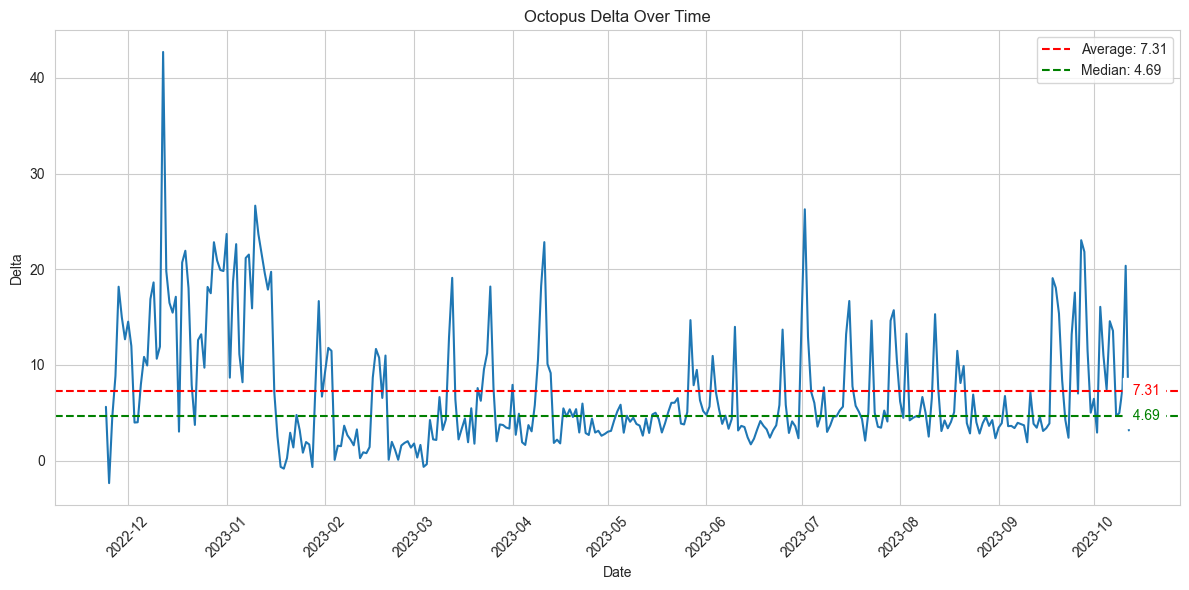

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average and median
average = octopus['Delta'].mean()
median = octopus['Delta'].median()

# Set Seaborn style
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=octopus, x='Date', y='Delta')
plt.title('Octopus Delta Over Time')
plt.xlabel('Date')
plt.ylabel('Delta')
plt.xticks(rotation=45)

# Annotate average and median on the plot
plt.axhline(y=average, color='r', linestyle='--', label=f'Average: {average:.2f}')
plt.axhline(y=median, color='g', linestyle='--', label=f'Median: {median:.2f}')

# Show the legend
plt.legend()

# Annotate the values
plt.text(octopus['Date'].iloc[-1], average, f' {average:.2f}', ha='left', va='center', color='r', backgroundcolor='w')
plt.text(octopus['Date'].iloc[-1], median, f' {median:.2f}', ha='left', va='center', color='g', backgroundcolor='w')

# Show the plot
plt.tight_layout()
plt.show()

## 4. Result
- 1 kWh Saving on Agile per year (nearly).

In [20]:
octopus['Delta'].sum() * 0.01

23.6246